In [1]:
import pathlib

path=str(pathlib.Path().resolve())+"/"

In [2]:
import pandas as pd


df = pd.read_csv(path+"reviews.csv")

Recogemos solo las primeras 1000 reviews, ya que el Dataset es muy grande y así por lo menos podemos ver el funcionamiento

In [3]:
df=df[:1000]

Definimos el nlp que se va encargar de la predicción y el tokenize para saber como divide el tokenizador

In [4]:
import torch
import transformers
from transformers import pipeline
from transformers import AutoTokenizer

device = 0 if torch.cuda.is_available() else -1
transformers.utils.logging.set_verbosity_error()

nlp = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment", device=device)
tokenize = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import numpy as np

def tokenizer(x):
    """ Devuelve la predicción del Score comprobando que no supere los 512 embeddings

    Args:
        x (str): Texto a predecir

    Returns:
        List: La predicción y la seguridad de la predicción
    """
    #tokenizer = " ".join(x.split(" ")).split("\n")
    #print(tokenizer.count(" "))
    
    # Revisa la tokenización del texto y comprueba si supera 512, y divide los resultados entre la media de la división de la tokenización
    if len(tokenize.tokenize(x))>512:
        segments = [x[i:i + 512] for i in range(0, len(x.split(" ")), 512)]
        results = []
        for segment in segments:
            predict = nlp(segment)[0]
            results.append((predict['label'].split(" ")[0], round(predict['score'], 4)))
        labels=np.array(results)[:,0]
        resultados=np.array(results)[:,1]
        return f"{np.average(int(labels)) if len(results)>1 else labels[0]} stars",np.average(results) if len(results)>1 else resultados[0]
    
    predict = nlp(x)[0]
    return predict['label'], round(predict['score'], 4)

x = df['review'].apply(tokenizer)


In [6]:
for i in x:
    print(i)

('3 stars', 0.3231)
('4 stars', 0.5124)
('5 stars', 0.8607)
('5 stars', 0.9053)
('5 stars', 0.5285)
('5 stars', 0.7611)
('3 stars', 0.3783)
('4 stars', 0.5148)
('5 stars', 0.431)
('5 stars', 0.6207)
('5 stars', 0.8162)
('5 stars', 0.7829)
('2 stars', 0.4633)
('5 stars', 0.8596)
('5 stars', 0.5503)
('5 stars', 0.876)
('5 stars', 0.6095)
('5 stars', 0.8955)
('5 stars', 0.9236)
('5 stars', 0.838)
('5 stars', 0.8411)
('4 stars', 0.2505)
('4 stars', 0.6494)
('5 stars', 0.7491)
('4 stars', 0.4529)
('2 stars', 0.4599)
('5 stars', 0.8515)
('2 stars', 0.588)
('4 stars', 0.5813)
('5 stars', 0.8864)
('5 stars', 0.5121)
('5 stars', 0.8812)
('5 stars', 0.5498)
('5 stars', 0.856)
('5 stars', 0.744)
('4 stars', 0.6126)
('5 stars', 0.8761)
('5 stars', 0.7452)
('4 stars', 0.5877)
('5 stars', 0.9443)
('5 stars', 0.8702)
('5 stars', 0.6175)
('5 stars', 0.835)
('4 stars', 0.5214)
('5 stars', 0.772)
('4 stars', 0.5754)
('5 stars', 0.68)
('3 stars', 0.322)
('5 stars', 0.8794)
('5 stars', 0.9642)
('5 stars',

In [7]:
import numpy as np
l = np.array(x.tolist())
df['label'],df['label_score'] = l[:,0],l[:,1]

In [16]:
df['score'].astype(int).shape
df['label'].str.split(" ").str[0].astype(int)

0      3
1      4
2      5
3      5
4      5
      ..
995    4
996    5
997    2
998    4
999    5
Name: label, Length: 1000, dtype: int32

Creamos la matriz de confusión para ver como predice el modelo con los comentarios dados

Vemos que a medida que los resultados a medida de que son superiores, tiene más probabilidad de fallar.

Donde más falla es cuando predice 4 ("3 en la matriz") que detecta los valores como 5 estrellas 

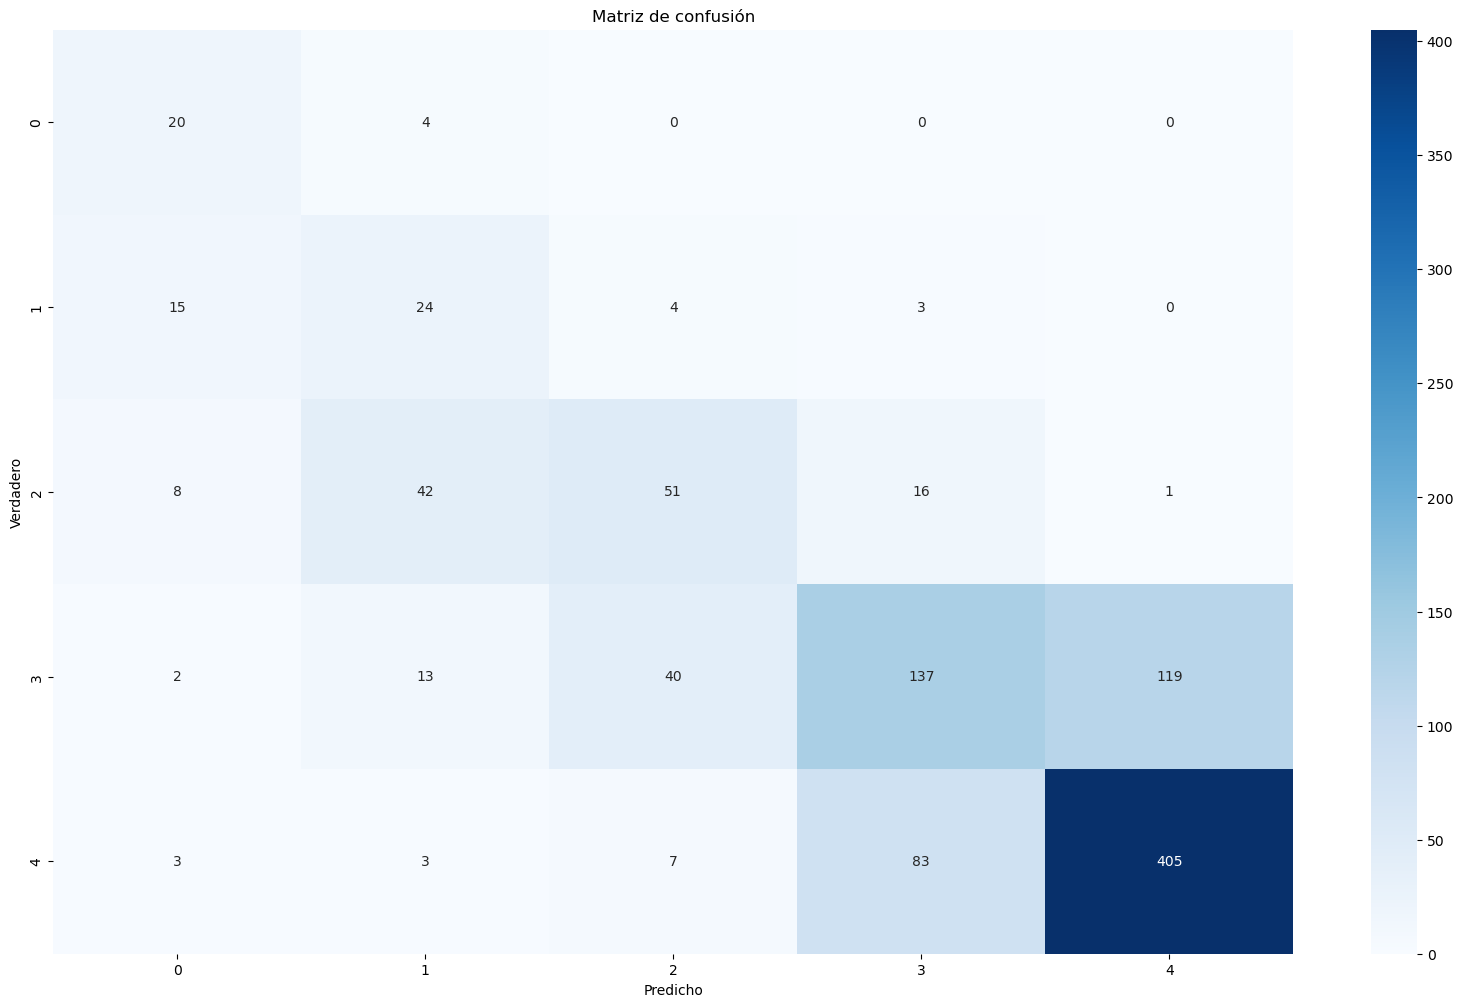

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(df['score'].astype(int), df['label'].str.split(" ").str[0].astype(int))

plt.figure(figsize=(20, 12))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.title('Matriz de confusión')
plt.show()